In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [7]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/most subscribed 1000 youtube channels/topSubscribed.csv')

In [8]:
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [10]:
#converting values from string to numbers
strings = ['Subscribers', 'Video Views', 'Video Count']
for s in strings:
    df[s] = pd.to_numeric(df[s].apply(lambda x: x.replace(',', '')))

In [11]:
df.iloc[df['Video Count'].argmax()]

Rank                           821
Youtube Channel           GMA News
Subscribers               12800000
Video Views            11220255933
Video Count                 342802
Category           News & Politics
Started                       2007
Name: 820, dtype: object

In [12]:
df['Category'].value_counts()

Entertainment                                                                   238
Music                                                                           217
People & Blogs                                                                  132
Gaming                                                                           94
Comedy                                                                           68
Film & Animation                                                                 50
Education                                                                        45
Howto & Style                                                                    43
https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels     30
News & Politics                                                                  27
Science & Technology                                                             18
Shows                                                                       

In [13]:
#renaming the url category as N/D (no data)
df['Category'].replace("https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels", "N/D", regex=True,inplace=True)

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,1000.0,5.005000e+02,2.888194e+02,1.0,2.507500e+02,5.005000e+02,7.502500e+02,1.000000e+03
Subscribers,1000.0,2.158140e+07,1.662556e+07,11400000.0,1.340000e+07,1.660000e+07,2.320000e+07,2.340000e+08
Video Views,1000.0,9.994912e+09,1.300546e+10,0.0,3.871470e+09,6.723360e+09,1.223052e+10,2.129003e+11
Video Count,1000.0,9.416228e+03,3.219091e+04,0.0,3.655000e+02,8.960000e+02,3.277250e+03,3.428020e+05
Started,1000.0,2.012594e+03,4.110238e+00,1970.0,2.010000e+03,2.013000e+03,2.015000e+03,2.021000e+03


In [17]:
import plotly.express as px

In [18]:
px.box(df, x="Subscribers", title="Subscribers")

In [20]:
px.box(df, x="Video Views", title="Video Views")

In [31]:
px.box(df, x="Video Count", title="Video Count")

In [24]:
#creates dataframes of the category count
byCategory = df['Category'].value_counts().to_frame('Count').rename_axis('Category').reset_index()
byCategory20m = df[df['Subscribers'] > 20000000]['Category'].value_counts().to_frame('Count').rename_axis('Category').reset_index()

In [25]:
byCategory

,Category,Count
0,Entertainment,238
1,Music,217
2,People & Blogs,132
3,Gaming,94
4,Comedy,68
5,Film & Animation,50
6,Education,45
7,Howto & Style,43
8,N/D,30
9,News & Politics,27


In [29]:
title = "Category of all channels (n=1000)"
px.pie(byCategory, values="Count", names="Category", title=title)

In [34]:
n = df[df['Subscribers'] < 20000000]['Rank'].count()
title = "Category on channels with less 20M subscribers (n="+str(n)+')'
px.pie(byCategory20m, values="Count", names="Category", title=title)

In [35]:
px.histogram(df, x="Subscribers", title="Total subscribers count", nbins=25)

In [38]:
px.box(df, y="Subscribers", x="Category", color="Category", title="Subscribers by category")

In [40]:
px.histogram(df.query('Started > 2003').sort_values('Started', ascending=True), x="Subscribers", color="Category",
             range_x=[df['Subscribers'].min(),df['Subscribers'].max()],
             range_y=[0, 70],
             animation_frame="Started", title="Subscribers by channel creation date")

In [42]:
df.Category.unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', 'Entertainment',
       'N/D', 'Gaming', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [45]:
df1 = df.drop(["Started"], axis = 1 )
df1.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category
0,1,T-Series,234000000,212900271553,18515,Music
1,2,YouTube Movies,161000000,0,0,Film & Animation
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education
3,4,SET India,150000000,137828094104,103200,Shows
4,5,MrBeast,128000000,21549128785,733,Entertainment


In [46]:
df1.isnull().sum()

Rank               0
Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
dtype: int64

Text(0.5, 1.0, 'Average Subscribers of Youtube Channel According to Category')

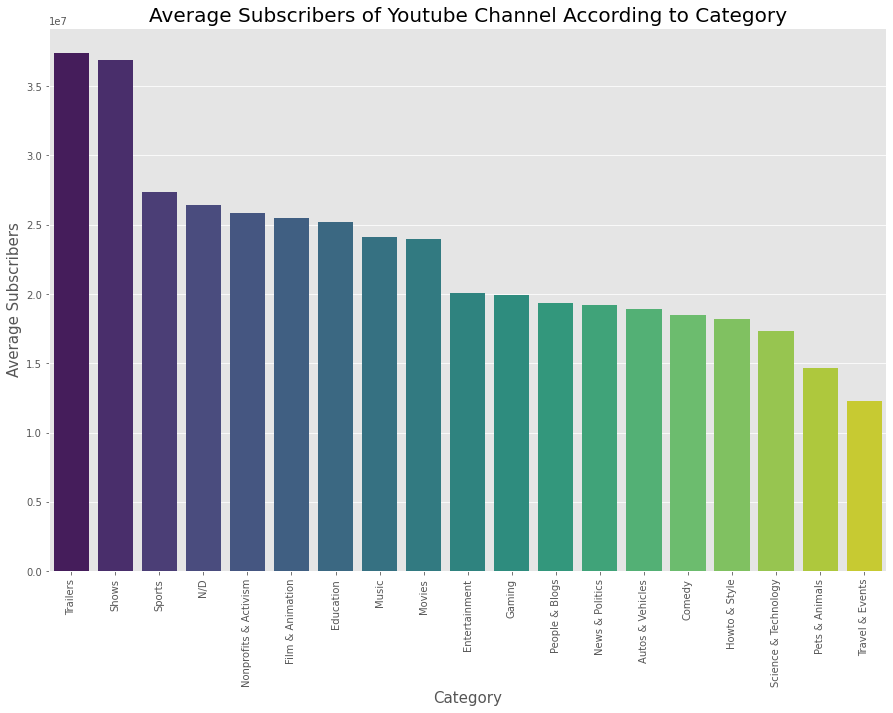

In [48]:
Category_list= list(df.Category.unique())
sub = []

for i in Category_list:
    x = df[df.Category == i]
    mean_sub = x["Subscribers"].mean()
    sub.append(mean_sub)
df_subs=pd.DataFrame({'categorylist':Category_list,'subs':sub})
new_index = df_subs.subs.sort_values(ascending = False).index.values
sorted_df_subs = df_subs.reindex(new_index)

plt.figure(figsize=(15,10))
sns.barplot(data = sorted_df_subs, x = "categorylist", y = "subs", palette = "viridis")

plt.xticks(rotation = 90)

plt.xlabel('Category', fontsize = 15)
plt.ylabel('Average Subscribers', fontsize = 15)
plt.title('Average Subscribers of Youtube Channel According to Category',
          fontsize = 20)

<AxesSubplot:>

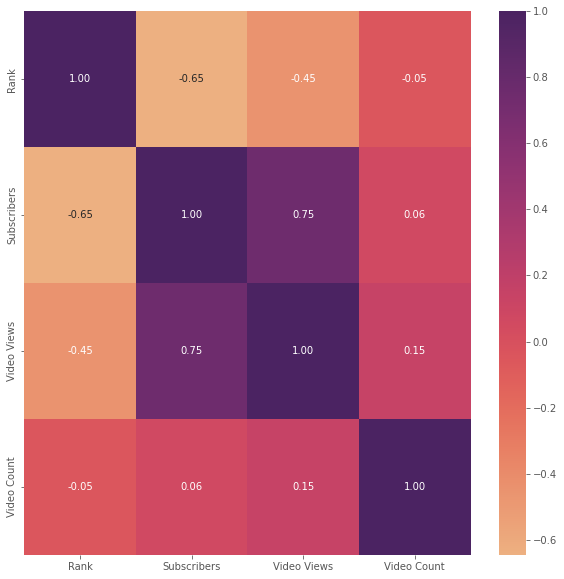

In [50]:
plt.figure(figsize = (10,10))
corr = df1.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap ="flare" )